In [1]:
import pandas as pd
import yfinance as yf

In [2]:
ticker = yf.Tickers(["LABB.MX", "VESTA.MX", "ORBIA.MX", "GFNORTEO.MX", "BBAJIOO.MX", "MEGACPO.MX",
                     "AC.MX", "GCC.MX", "GENTERA.MX", "CUERVO.MX", "AMXB.MX", "GCARSOA1.MX",
                     "KIMBERA.MX", "GMEXICOB.MX", "CHDRAUIB.MX", "GRUMAB.MX", "KOFUBL.MX",
                     "RA.MX", "BOLSAA.MX", "ALSEA.MX", "TLEVISACPO.MX", "Q.MX", "BIMBOA.MX",
                     "PINFRA.MX", "GAPB.MX", "ASURB.MX", "OMAB.MX", "CEMEXCPO.MX"])
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  28 of 28 completed


Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,...,KOFUBL.MX,LABB.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702606,37.795330,11.671398,152.225357,NaN,34.200211,15.430018,11.531771,37.507202,NaN,...,NaN,19.345699,38.958515,38.346153,33.284710,130.751816,NaN,54.440792,88.730598,23.547869
2015-02-01 00:00:00+00:00,70.285477,43.193310,11.671398,159.254822,NaN,37.858749,16.780146,13.125944,44.206848,NaN,...,NaN,13.299150,39.022583,39.573231,34.902489,138.726166,NaN,55.739498,92.414078,23.328480
2015-03-01 00:00:00+00:00,69.477180,42.006321,11.124300,159.635452,NaN,38.791325,16.133083,12.536793,41.669655,NaN,...,NaN,11.775289,42.517673,41.436150,32.001629,126.094261,NaN,54.553112,91.677391,23.035963
2015-04-01 00:00:00+00:00,69.892456,43.400566,11.737048,168.668945,NaN,36.944115,18.360477,13.335612,41.570332,NaN,...,NaN,14.749669,45.450409,42.735744,35.294956,136.695755,NaN,61.762737,101.554527,23.328480
2015-05-01 00:00:00+00:00,70.519684,43.626663,11.744344,176.417786,NaN,37.374538,16.991686,12.993213,42.587986,NaN,...,NaN,13.535471,46.048355,40.197926,37.479813,130.000061,NaN,59.649700,105.901932,22.910898


In [3]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)

In [4]:
data = data.melt(ignore_index=False)
     

data.head()

,Ticker,value
Date,,
2015-01-01,AC.MX,65.702606
2015-02-01,AC.MX,70.285477
2015-03-01,AC.MX,69.477180
2015-04-01,AC.MX,69.892456
2015-05-01,AC.MX,70.519684


In [5]:
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
     

df.head()

,ds,y,unique_id
0,2015-01-01,65.702606,AC.MX
1,2015-02-01,70.285477,AC.MX
2,2015-03-01,69.477180,AC.MX
3,2015-04-01,69.892456,AC.MX
4,2015-05-01,70.519684,AC.MX


In [6]:
df.dropna(inplace=True)

In [7]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

In [8]:
train.shape, test.shape

((2573, 3), (336, 3))

In [9]:
df.head()

,ds,y,unique_id
0,2015-01-01,65.702606,AC.MX
1,2015-02-01,70.285477,AC.MX
2,2015-03-01,69.477180,AC.MX
3,2015-04-01,69.892456,AC.MX
4,2015-05-01,70.519684,AC.MX


In [10]:
from statsforecast.models import AutoETS
from statsforecast import StatsForecast

In [11]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoETS(season_length=season_length, model='ZZZ')]

In [12]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [13]:
sf.fit()

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoETS])

In [14]:
sf.fitted_[0,0].model_.keys()

dict_keys(['loglik', 'aic', 'bic', 'aicc', 'mse', 'amse', 'fit', 'residuals', 'components', 'm', 'nstate', 'fitted', 'states', 'par', 'sigma2', 'n_params', 'method', 'actual_residuals'])

In [15]:
sf.fitted_[0,0].model_['method']

'ETS(M,N,N)'

In [16]:
sf.fitted_[0,0].model_['amse']

46.88421846824995

In [17]:
sf.fitted_[0,0].predict_in_sample()

{'fitted': array([ 65.54664579,  65.70259061,  70.2850184 ,  69.47726126,
         69.89241454,  70.51962111,  67.43881519,  73.2302405 ,
         72.1585697 ,  71.87905627,  79.86059093,  78.80425146,
         79.05331219,  81.86994231,  83.51635298,  90.19173047,
         89.68648241,  94.11215199, 100.54109746,  92.53296642,
         89.90092088,  88.51217807,  90.23805524,  83.2880791 ,
         82.91150617,  86.30981028,  86.31782452,  99.81157011,
        106.54056391, 102.24536365, 106.15846027, 102.7266692 ,
        101.80796847,  96.88922483,  94.96639408,  99.32452294,
        105.80014125, 105.11593604, 101.83934747,  97.84649155,
        100.60894614,  93.15340218,  96.84753094,  98.00432462,
         93.12530485,  95.75448254,  80.91932271,  83.29402825,
         86.95362113,  88.1024852 ,  86.09074685,  85.65490504,
         85.24299163,  84.76626777,  84.0379833 ,  82.48436253,
         84.97636668,  86.31978905,  86.96723566,  83.76309968,
         83.05073042,  86.6837

In [18]:
test_hat = sf.forecast(fitted = True, h = horizon)

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [19]:
train_hat = sf.forecast_fitted_values()

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [20]:
fitted = sf.fit_predict(df=train, h = horizon)

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [21]:
fitted.head()

,ds,AutoETS
unique_id,,
AC.MX,2023-01-01,147.468262
AC.MX,2023-02-01,147.468262
AC.MX,2023-03-01,147.468262
AC.MX,2023-04-01,147.468262
AC.MX,2023-05-01,147.468262


In [22]:
test_hat.head()

,ds,AutoETS
unique_id,,
AC.MX,2023-01-01,147.468262
AC.MX,2023-02-01,147.468262
AC.MX,2023-03-01,147.468262
AC.MX,2023-04-01,147.468262
AC.MX,2023-05-01,147.468262


In [23]:

from sklearn import metrics
import numpy as np

In [24]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoETS']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [25]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MAPE score for AC.MX: 7.900408107231528
MAPE score for ALSEA.MX: 30.635296579629863
MAPE score for AMXB.MX: 9.164919203534795
MAPE score for ASURB.MX: 9.504775095000241
MAPE score for BBAJIOO.MX: 7.885178538475435
MAPE score for BIMBOA.MX: 8.531736882186959
MAPE score for BOLSAA.MX: 10.141930234776405
MAPE score for CEMEXCPO.MX: 29.306708765477303
MAPE score for CHDRAUIB.MX: 16.559521482304955
MAPE score for CUERVO.MX: 11.604977064403467
MAPE score for GAPB.MX: 11.264741709899083
MAPE score for GCARSOA1.MX: 29.410270875227624
MAPE score for GCC.MX: 11.273305849542165
MAPE score for GENTERA.MX: 7.5973376085197
MAPE score for GFNORTEO.MX: 14.144419160852914
MAPE score for GMEXICOB.MX: 18.758702970026054
MAPE score for GRUMAB.MX: 11.267634263528361
MAPE score for KIMBERA.MX: 13.361193088477025
MAPE score for KOFUBL.MX: 9.727786710035797
MAPE score for LABB.MX: 16.026170861346614
MAPE score for MEGACPO.MX: 18.6696739359647
MAPE score for OMAB.MX: 16.083249217126777
MAPE score for ORBIA.MX:

C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

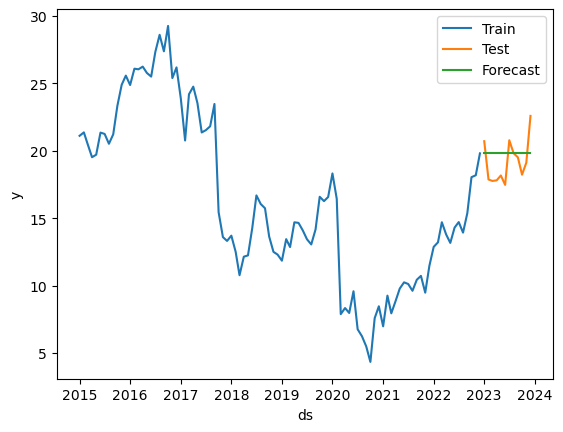

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
     

sns.lineplot(train[train['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'GENTERA.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

In [27]:
sf.fitted_[14,0].model_['method']

'ETS(M,N,N)'

C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

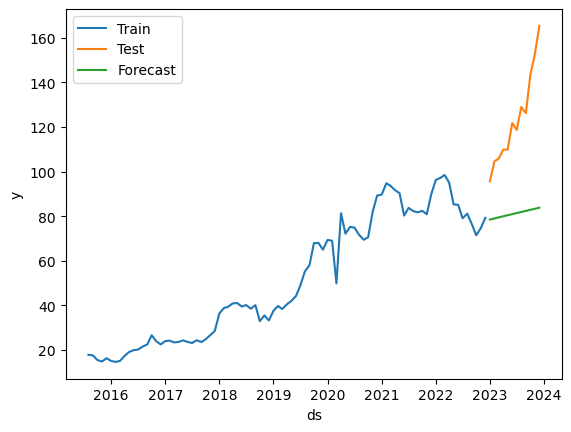

In [28]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()
     

In [29]:

sf.fitted_[24,0].model_['method']

'ETS(M,A,N)'